In [ ]:
import os

os.makedirs('utils/', exist_ok=True)
os.chdir('utils')

! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/models.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/losses.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/vision.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/callbacks.py
! wget https://raw.githubusercontent.com/Ata-Pab/Machine_Learning/master/utils/utils.py

os.chdir('/content')
print("Current working directory", os.getcwd())

In [2]:
from utils import vision
from utils import utils
from utils import losses

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ROOT_PATH = '/content'
DATASET_PATH = '/content/drive/MyDrive/MASTER/Master_Thesis/Dataset/BD67_Dataset'
BD67_NORMAL_PATH = os.path.join(DATASET_PATH, 'defect_free')
BD67_NORMAL_FRONT_PATH = os.path.join(DATASET_PATH, 'defect_free/Front/cropped')
BD67_NORMAL_FRONT_ROTATED_PATH = os.path.join(DATASET_PATH, 'defect_free/Front/rotated_images/cropped')
BD67_NORMAL_REAR_PATH = os.path.join(DATASET_PATH, 'defect_free/Rear')
BD67_DEFECTED_FRONT_PATH = os.path.join(DATASET_PATH, 'defected/Front/cropped')
BD67_DEFECTED_REAR_PATH = os.path.join(DATASET_PATH, 'defected/Rear')

In [6]:
img_files = utils.get_image_file_list(BD67_NORMAL_FRONT_PATH, 'png')
rotated_img_files = utils.get_image_file_list(BD67_NORMAL_FRONT_ROTATED_PATH, 'png')
all_img_files = img_files + rotated_img_files

print("Number of flat image files: ", len(img_files))
print("Number of rotated image files: ", len(rotated_img_files))
print("Number of all image files: ", len(all_img_files))

Number of flat image files:  110
Number of rotated image files:  105
Number of all image files:  215


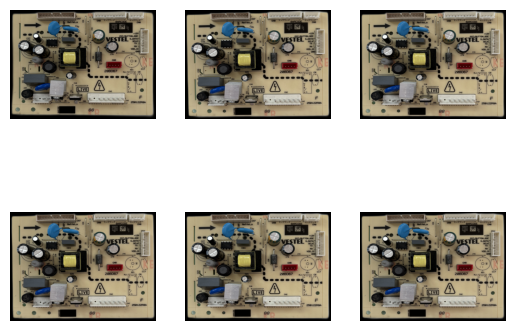

In [24]:
import matplotlib.pyplot as plt

for ix in range(6):
  plt.subplot(2, 3, (ix+1))
  plt.imshow(utils.load_images(img_files[ix]))
  plt.axis('off')

plt.show()

In [21]:
sample_img = utils.load_images(img_files[0])
height, width = sample_img.shape[0], sample_img.shape[1]
x_partition = width // 224
y_partition = height // 224

print("sample_img.shape: ", sample_img.shape)
print("sample_img height: ", height)
print("sample_img width: ", width)
print("sample_img x_partition for (224, 224) image shape: ", x_partition)
print("sample_img y_partition for (224, 224) image shape: ", y_partition)

sample_img.shape:  (1344, 1792, 3)
sample_img height:  1344
sample_img width:  1792
sample_img x_partition for (224, 224) image shape:  8
sample_img y_partition for (224, 224) image shape:  6


In [15]:
image_data = utils.patchify_images(img_files, patch_size=224, method='CROP', cvt_rgb=True, verbose=1)

In [17]:
image_data.shape

(5280, 224, 224, 3)

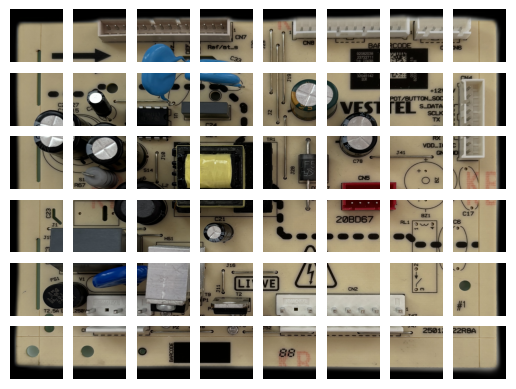

In [23]:
for ix in range(x_partition*y_partition):
  plt.subplot(y_partition, x_partition, (ix+1))
  plt.imshow(image_data[ix])
  plt.axis('off')

plt.show()